[Understandable_Statistics](https://www.youtube.com/watch?v=-FMeXUcZC48&list=PL4BztsgicSEeC4Oic6s5vW4LE-0YZTuo-&index=16&t=4s)
[Jason_Brownlee](https://machinelearningmastery.com/how-to-calculate-nonparametric-rank-correlation-in-python/)
[scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html)

In [1]:
%matplotlib inline

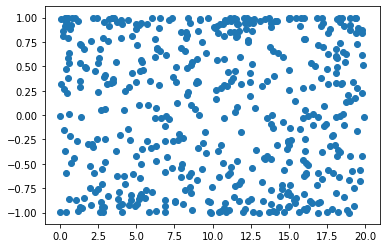

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html
# The p-value roughly indicates 
# the probability of an uncorrelated system producing datasets 
# that have a Spearman correlation at least as extreme as 
# the one computed from these datasets. 
# The p-values are not entirely reliable 
# but are probably reasonable for datasets larger than 500 or so.
data1 = np.random.rand(500) * 20
#data2 = (data1 + (np.random.rand(500) * 10))**3
data2 = np.sin(data1 + (np.random.rand(500) * 10))

plt.scatter(data1, data2)
plt.show()

In [3]:
import pandas as pd

data = {'data1': data1, 'data2': data2}
df = pd.DataFrame(data)
print(df.corr(method='pearson'))
print(df.corr(method='spearman'))
print(df.corr(method='kendall'))

          data1     data2
data1  1.000000 -0.026208
data2 -0.026208  1.000000
          data1     data2
data1  1.000000 -0.023098
data2 -0.023098  1.000000
          data1     data2
data1  1.000000 -0.012361
data2 -0.012361  1.000000


<div align="center"><img src="img/Screen Shot 2019-08-19 at 4.36.10 PM.png" width="100%" height="30%"></div>

[wiki](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient)

In [4]:
import scipy.stats as stats

if 0:
    # Spearman’s Rank Correlation
    coef, p = stats.spearmanr(data1, data2)
    print('Spearman\'s rank correlation coefficient: {}'.format(coef))
elif 1:
    # Kendall’s Rank Correlation
    coef, p = stats.kendalltau(data1, data2)
    print('Kendall\’s rank correlation coefficient: {}'.format(coef))

Spearman's rank correlation coefficient: -0.023098364393457572


In [5]:
alpha = 0.05
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html
# pvalue float
# The two-sided p-value for a hypothesis test 
# whose null hypothesis is that two sets of data are uncorrelated, 
# has same dimension as rho.
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p={}'.format(p))
else:
    print('Samples are correlated (reject H0) p={}'.format(p))

Samples are uncorrelated (fail to reject H0) p=0.6063635528614038


[Code Project] Compute Spearman’s rank correlation of data1 and data2 using pandas' basic functionalities without corr method. 

<div align="center"><img src="img/Screen Shot 2019-08-19 at 4.54.24 PM.png" width="100%" height="30%"></div>

[Understandable_Statistics](https://www.youtube.com/watch?v=-FMeXUcZC48&list=PL4BztsgicSEeC4Oic6s5vW4LE-0YZTuo-&index=16&t=4s)

In [6]:
alpha = 0.05
if (p/2) > alpha:
    print('Samples are uncorrelated (fail to reject H0) p={}'.format(p/2))
else:
    print('Samples are positively correlated (reject H0) p={}'.format(p/2))

Samples are uncorrelated (fail to reject H0) p=0.3031817764307019
